<a href="https://colab.research.google.com/github/brendhaed/Faculdade-ADS/blob/main/L%C3%B3gica%20e%20Programa%C3%A7%C3%A3o%20de%20Computadores/exercicio_aula_9_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar dados
!curl https://raw.githubusercontent.com/mflash/logicaeprogramacao/main/aula09/partidos-fake.csv -o partidos-fake.csv
!curl https://raw.githubusercontent.com/mflash/logicaeprogramacao/main/aula09/eleicoes-municipais-fake.csv -o eleicoes-municipais-fake.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1078  100  1078    0     0   3122      0 --:--:-- --:--:-- --:--:--  3124
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1980k  100 1980k    0     0  3193k      0 --:--:-- --:--:-- --:--:-- 3198k


In [6]:
#exercicio pt1: : determinar a composição da Câmara Municipal de uma determinada cidade
cid = input("Cidade:").upper()
vagas = int(input("Vagas:"))

partidos = {}   # nome, total de votos, vagas (quoc. part) e media
votos = {}      # sigla e total de votos
totalGeral = 0

with open("partidos-fake.csv") as csv:
  csv.readline()
  for linha in csv:
    dados = linha[:-1].split(",")
    aux = { 'nome': dados[1], 'votos': 0, 'vagas': 0,
           'media': 0}
    partidos[dados[0]] = aux

with open("eleicoes-municipais-fake.csv") as csv:
  csv.readline()
  for linha in csv:
    dados = linha[:-1].split(",")
    cidade = dados[1]
    sigla = dados[2]
    cargo = dados[3]
    nome = dados[4]
    totalVotos = int(dados[5])
    if cidade != cid or cargo != "VEREADOR":
      continue
    if nome not in votos:
      votos[nome] = { "sigla": sigla, "votos": 0}
    votos[nome]["votos"] += totalVotos
    partidos[sigla]["votos"] += totalVotos
    totalGeral += totalVotos


print(partidos)

Cidade:porto alegre
Vagas:36
{'PR': {'nome': 'PARTIDO RENASCENTISTA', 'votos': 55276, 'vagas': 0, 'media': 0}, 'PV': {'nome': 'PARTIDO VIAJANTE', 'votos': 58136, 'vagas': 0, 'media': 0}, 'PG': {'nome': 'PARTIDO GRANDIOSO ', 'votos': 46495, 'vagas': 0, 'media': 0}, 'PSF': {'nome': 'PARTIDO SOCIAL FELIZ', 'votos': 18684, 'vagas': 0, 'media': 0}, 'PVN': {'nome': 'PARTIDO VIGILANTE NACIONAL', 'votos': 72397, 'vagas': 0, 'media': 0}, 'PGB': {'nome': 'PARTIDO GRANDE BRASILEIRO', 'votos': 68148, 'vagas': 0, 'media': 0}, 'PST': {'nome': 'PARTIDO SOCIAL DA TERRA', 'votos': 51590, 'vagas': 0, 'media': 0}, 'PEN': {'nome': 'PARTIDO DO EMPREGO NACIONAL', 'votos': 26856, 'vagas': 0, 'media': 0}, 'PPL': {'nome': 'PARTIDO DA POLITICA LIVRE', 'votos': 0, 'vagas': 0, 'media': 0}, 'PGDB': {'nome': 'PARTIDO GRANDE DO BRASIL', 'votos': 1056, 'vagas': 0, 'media': 0}, 'PSO': {'nome': 'PARTIDO SEMPRE OUVINTE', 'votos': 0, 'vagas': 0, 'media': 0}, 'MFT': {'nome': 'MOVIMENTO FELIZ E TRABALHADOR', 'votos': 28043

In [7]:
#exercicio pt2:
print(f"Total votos: {totalGeral}")
qe = totalGeral//vagas
print(f"QE: {qe}")

# Calcula as vagas iniciais
somaVagas = 0

for sigla,dados in partidos.items():
  qp = dados['votos']//qe
  if qp > 0:
    dados['vagas'] = qp
    somaVagas += qp
    print(sigla,dados)

print()
print("Total de vagas já ocupadas:",somaVagas)
print()

Total votos: 621331
QE: 17259
PR {'nome': 'PARTIDO RENASCENTISTA', 'votos': 55276, 'vagas': 3, 'media': 0}
PV {'nome': 'PARTIDO VIAJANTE', 'votos': 58136, 'vagas': 3, 'media': 0}
PG {'nome': 'PARTIDO GRANDIOSO ', 'votos': 46495, 'vagas': 2, 'media': 0}
PSF {'nome': 'PARTIDO SOCIAL FELIZ', 'votos': 18684, 'vagas': 1, 'media': 0}
PVN {'nome': 'PARTIDO VIGILANTE NACIONAL', 'votos': 72397, 'vagas': 4, 'media': 0}
PGB {'nome': 'PARTIDO GRANDE BRASILEIRO', 'votos': 68148, 'vagas': 3, 'media': 0}
PST {'nome': 'PARTIDO SOCIAL DA TERRA', 'votos': 51590, 'vagas': 2, 'media': 0}
PEN {'nome': 'PARTIDO DO EMPREGO NACIONAL', 'votos': 26856, 'vagas': 1, 'media': 0}
MFT {'nome': 'MOVIMENTO FELIZ E TRABALHADOR', 'votos': 28043, 'vagas': 1, 'media': 0}
PAC {'nome': 'PARTIDO DA AÇÃO COMUNITÁRIA', 'votos': 18131, 'vagas': 1, 'media': 0}
PPF {'nome': 'PARTIDO DAS PESSOAS FELIZES', 'votos': 20069, 'vagas': 1, 'media': 0}
PLI {'nome': 'PARTIDO DA LIBERDADE INDIVIDUAL', 'votos': 51429, 'vagas': 2, 'media': 0}

In [8]:
#exercicio pt3:
# Calcula a média de cada partido, de acordo com o total de votos e as vagas já recebidas

for sigla,dados in partidos.items():
  me = dados['votos']//(dados['vagas']+1)
  dados['media'] = me
  #print(sigla,dados)

# Distribuir vagas disponíveis para cada partido, em ordem decrescente
# de media
for sigla,dados in sorted(partidos.items(), key=lambda x:x[1]['media'],
                          reverse=True):
  if somaVagas < vagas:
    dados['vagas'] += 1
    somaVagas += 1

#print(f"Total vagas ocup.: {somaVagas}")

salvaVagas = {} # armazena o total de vagas original para cada partido
for p in partidos:
  salvaVagas[p] = partidos[p]['vagas']

# Finalmente, passa por todos os candidatos, em ordem decrescente de votos,
# e enquanto houver vagas para o partido, mostra que foi eleito (e diminui uma
# vaga do partido)

for nome,dados in sorted(votos.items(), key=lambda x:x[1]['votos'], reverse=True):
  sigla = dados['sigla']
  if partidos[sigla]['vagas'] > 0:
    print(f"{nome:40} {sigla:4} {dados['votos']} votos")
    partidos[sigla]['vagas'] -= 1


FERNANDA DE JESUS OLIVEIRA HENRIQUES     PLI  14630 votos
MAURO ADRIANA LIPPERT DA SILVA           PG   13551 votos
THIAGO DA SILVA VERNIERI                 MFT  12669 votos
RODRIGO ALMEIDA VIEIRA                   PO   11770 votos
FELIPE FERREIRA ABRAO                    PIA  10488 votos
ELIZANDRO PAULA PINHEIRO BRUNO           PGB  9845 votos
SOFIA ALTHAUS                            PV   9670 votos
VALTER NOE FURTADO DE FRAGA              PVN  9300 votos
CARLOS OSMAR DOS SANTOS LUIZ             PLI  8354 votos
JOSE VIEIRA DE VARGAS                    PSF  7728 votos
MARCELO RICARDO STURMER                  PV   7585 votos
MONICA PRIGOL RIBEIRO                    PR   7254 votos
JOSE FRAINS DE LIMA                      PPP  7106 votos
ANDRE VINICIUS FRANQUI VARGAS            PVN  6882 votos
MARCIO PAULA VELHO                       PG   6858 votos
NADIA BRAGA COFFI                        PVN  6809 votos
PABLO FRANCA DE OLIVEIRA                 PVN  6691 votos
IDENIR AMARAL GOMES       

{'PR': 3, 'PV': 4, 'PG': 3, 'PSF': 1, 'PVN': 5, 'PGB': 4, 'PST': 3, 'PEN': 1, 'PPL': 0, 'PGDB': 0, 'PSO': 0, 'MFT': 2, 'PAC': 1, 'PPI': 1, 'PMMA': 0, 'PCT': 1, 'PPF': 1, 'PA': 0, 'PO': 1, 'PRB': 0, 'PLI': 3, 'PE': 0, 'PSN': 0, 'PPC': 0, 'PPO': 0, 'PPP': 1, 'PUB': 0, 'PEC': 0, 'PLB': 0, 'PS': 0, 'PEB': 0, 'PIA': 1, 'PCN': 0}

Total de vagas ocupadas: 36



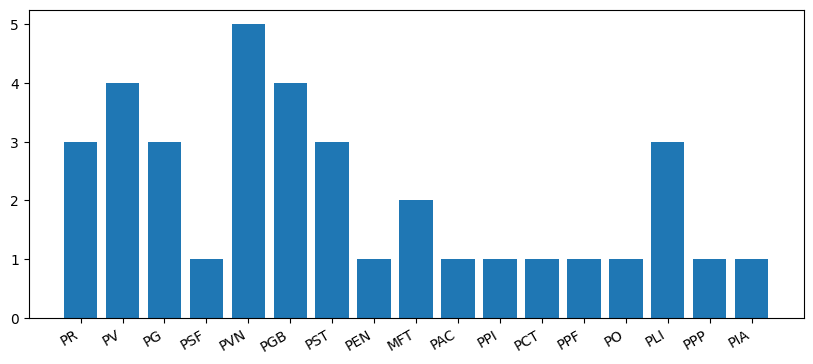

In [9]:
#exercicio pt4
import matplotlib.pyplot as plt

print(salvaVagas)

totalFinalVagas = 0
nomes = []
valores = []

# Monta a lista de nomes (siglas) e valores (total de votos) para o gráfico
for p in salvaVagas:
  if salvaVagas[p] > 0:
    nomes.append(p)
    valores.append(salvaVagas[p])
    totalFinalVagas += salvaVagas[p]

print()
print("Total de vagas ocupadas:",totalFinalVagas)
print()

plt.figure(figsize=(10,4))
plt.xticks(rotation=30, ha='right')
plt.bar(nomes,valores)
plt.show()